In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [4]:
X = df.drop("price", axis=1)
y = df["price"]

In [5]:
X = pd.get_dummies(X, drop_first=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [9]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

MAE: 970043.4039201641
MSE: 1754318687330.6633
R^2: 0.6529242642153185


In [10]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

In [11]:
print(coefficients)

                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                           parking  2.248419e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
7                      basement_yes  3.902512e+05
8               hotwaterheating_yes  6.846499e+05
9               airconditioning_yes  7.914267e+05
10                     prefarea_yes  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05


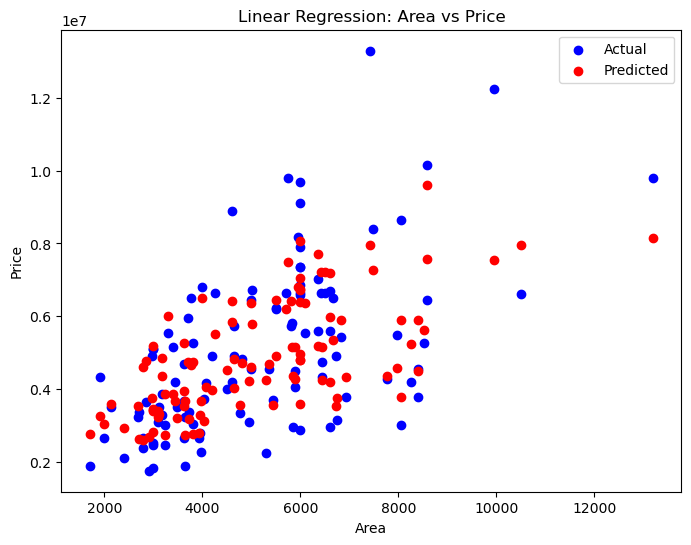

In [12]:
if "area" in X.columns:
    plt.figure(figsize=(8,6))
    plt.scatter(X_test["area"], y_test, color="blue", label="Actual")
    plt.scatter(X_test["area"], y_pred, color="red", label="Predicted")
    plt.xlabel("Area")
    plt.ylabel("Price")
    plt.title("Linear Regression: Area vs Price")
    plt.legend()
    plt.show()
else:
    print("\nNote: 'area' column not found, so skipping simple regression plot.")

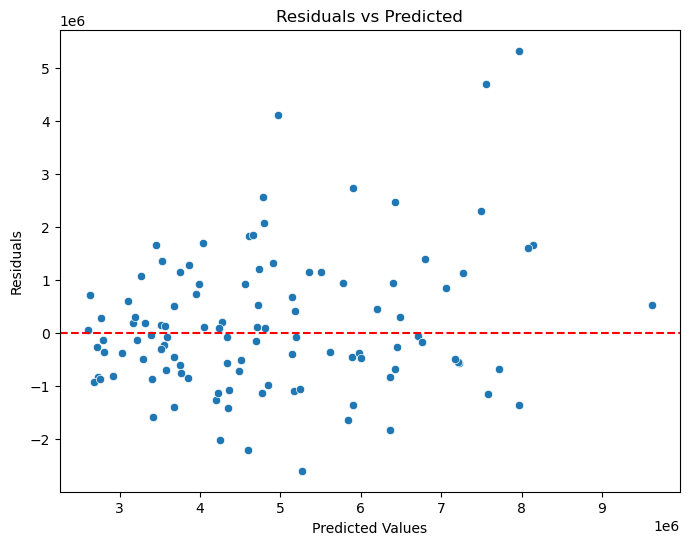

In [13]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

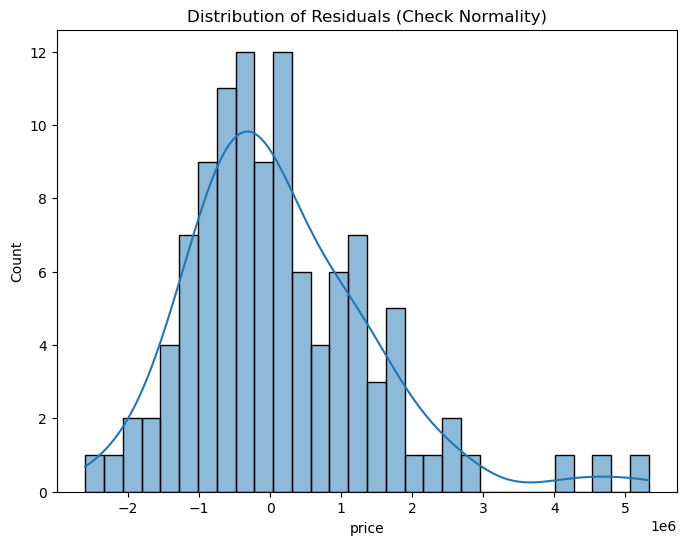

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals (Check Normality)")
plt.show()

In [15]:
X_numeric = X.copy()
X_numeric = X_numeric.apply(lambda col: col.astype(float))

In [16]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

In [17]:
print(vif_data)

                            Feature        VIF
0                              area   8.276447
1                          bedrooms  16.652387
2                         bathrooms   9.417643
3                           stories   7.880730
4                           parking   1.986400
5                      mainroad_yes   6.884806
6                     guestroom_yes   1.473234
7                      basement_yes   2.019858
8               hotwaterheating_yes   1.091568
9               airconditioning_yes   1.767753
10                     prefarea_yes   1.494211
11  furnishingstatus_semi-furnished   2.386831
12     furnishingstatus_unfurnished   2.008632
